In [1]:
# Imports
import matplotlib.pyplot as plt
plt.style.use('plot_style.mplstyle')
import yaml
import numpy as np
import pingouin as pg
import pandas as pd
import scipy as sc
from scipy.stats import pearsonr as corr
from tqdm import tqdm
from sklearn.metrics import normalized_mutual_info_score as NMI

# Custom functions
from functions.dataloaders import load_data
from functions.signal_processing import preprocess_data

# Params
with open('params.yaml','r') as file:
    params = yaml.full_load(file)

# Plot footprints and calcium traces with associated colors

In [2]:
# Pick example session/mouse
#session_path='../../datasets/calcium_imaging/M990/M990_legoOF_20190114'
session_path = '../../datasets/calcium_imaging/M246/M246_LT_6'
data = load_data(session_path)
data = preprocess_data(data,params)

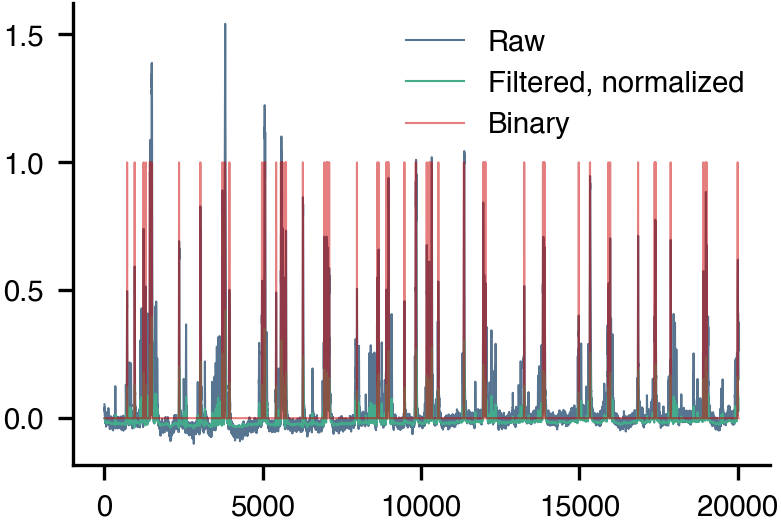

In [64]:
plt.figure(figsize=(3,2))
plt.plot(data['caTrace'][:,0], label='Raw')
plt.plot(data['neuralData'][:,0], label='Filtered, normalized')
plt.plot(data['binaryData'][:,0],c=(.8,0,0,.5), label='Binary')
#plt.xlim([2500,3500])
plt.legend()

In [27]:
p_threshold = .05
idle_corr_mx = np.zeros((data['numNeurons'],data['numNeurons']))
run_corr_mx = np.zeros((data['numNeurons'],data['numNeurons']))
idle_NMI_mx = np.zeros((data['numNeurons'],data['numNeurons']))
run_NMI_mx = np.zeros((data['numNeurons'],data['numNeurons']))

for i in tqdm(range(data['numNeurons'])):
    for j in range(data['numNeurons']):
        if j>i:
            # Compute normalized mutual information
            idle_NMI_mx[j,i] = NMI(data['binaryData'][~data['running_ts'],i],data['binaryData'][~data['running_ts'],j])
            run_NMI_mx[j,i] = NMI(data['binaryData'][data['running_ts'],i],data['binaryData'][data['running_ts'],j])

            temp_idle = corr(data['neuralData'][~data['running_ts'],i],data['neuralData'][~data['running_ts'],j])
            #if temp_idle[1] < p_threshold:
            idle_corr_mx[j,i] = temp_idle[0]
            
            temp_run = corr(data['neuralData'][data['running_ts'],i],data['neuralData'][data['running_ts'],j])
            #if temp_run[1] < p_threshold:    
            run_corr_mx[j,i] = temp_run[0]
        else:
            idle_NMI_mx[j,i] = np.nan
            run_NMI_mx[j,i] = np.nan      
            idle_corr_mx[j,i] = np.nan
            run_corr_mx[j,i] = np.nan     

100%|██████████| 448/448 [05:24<00:00,  1.38it/s]


/var/folders/6w/ytj5_yt9507dd2yb0htxhhfr0000gn/T/ipykernel_78842/3854177111.py:18: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)


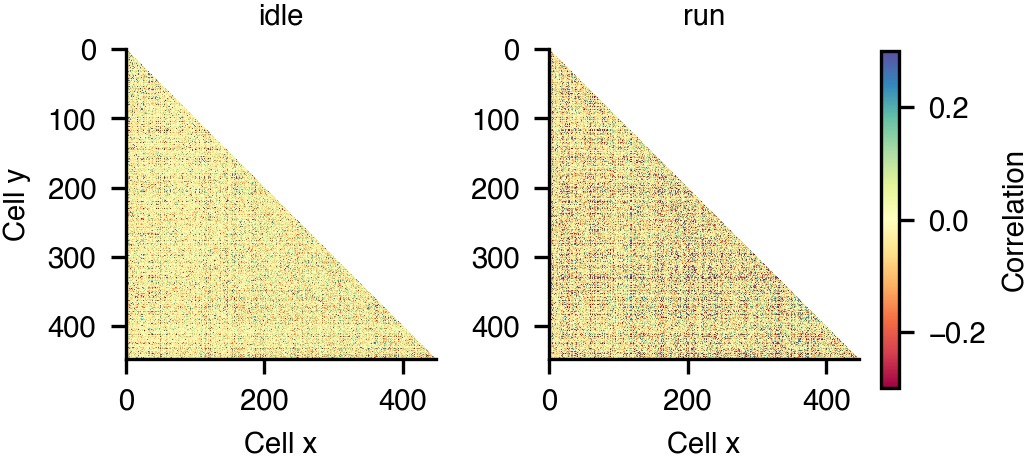

In [28]:
plt.figure(figsize=(3,1.5))
plt.subplot(121)
plt.imshow(idle_corr_mx, interpolation='none',vmin=-.3,vmax=.3, cmap='Spectral')
plt.title('idle')
plt.xlabel('Cell x')
plt.ylabel('Cell y')
#plt.axis('off')

plt.subplot(122)
plt.imshow(run_corr_mx, interpolation='none',vmin=-.3,vmax=.3, cmap='Spectral')
plt.title('run')
plt.xlabel('Cell x')
#plt.ylabel('Cell y')
#plt.axis('off')

cax = plt.axes([1, 0.15, 0.02, 0.75])
plt.colorbar(cax=cax, label='Correlation')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.savefig('results/figures/fig2/idle_run_corrs.pdf', bbox_inches='tight')

/var/folders/6w/ytj5_yt9507dd2yb0htxhhfr0000gn/T/ipykernel_78842/4067236933.py:18: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)


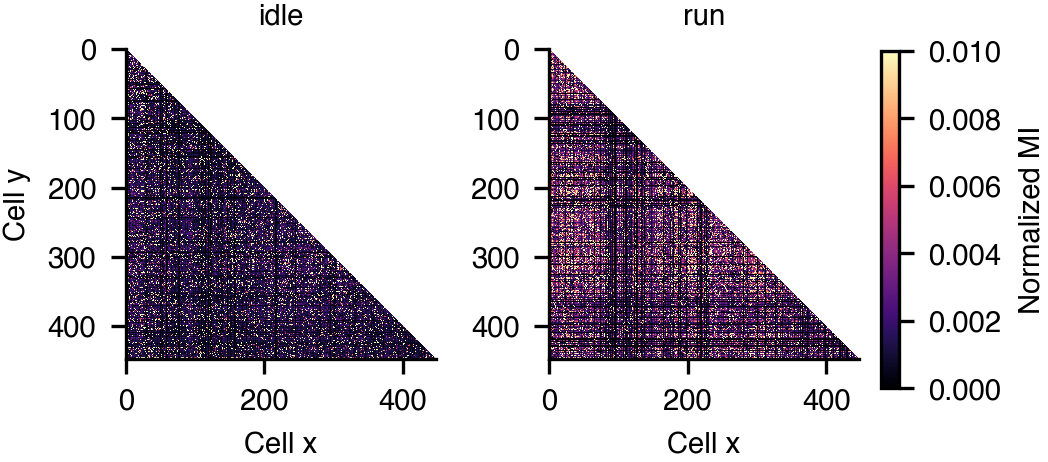

In [44]:
plt.figure(figsize=(3,1.5))
plt.subplot(121)
plt.imshow(idle_NMI_mx, interpolation='none',vmin=0,vmax=.01, cmap='magma')
plt.title('idle')
plt.xlabel('Cell x')
plt.ylabel('Cell y')
#plt.axis('off')

plt.subplot(122)
plt.imshow(run_NMI_mx, interpolation='none',vmin=0,vmax=.01, cmap='magma')
plt.title('run')
plt.xlabel('Cell x')
#plt.ylabel('Cell y')
#plt.axis('off')

cax = plt.axes([1, 0.15, 0.02, 0.75])
plt.colorbar(cax=cax, label='Normalized MI')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.savefig('results/figures/fig2/idle_run_NMI_mx.pdf', bbox_inches='tight')

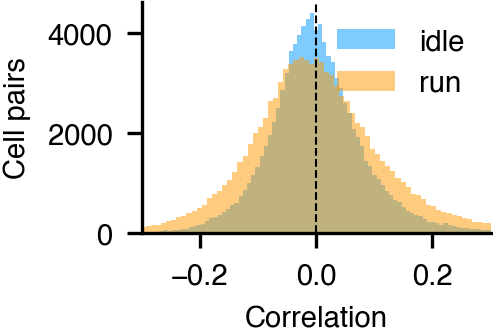

In [49]:
# Plot histogram
plt.hist(idle_corr_mx.flatten(), bins=200, color=[0,.6,1,.5], label='idle')
plt.hist(run_corr_mx.flatten(), bins=200, color=[1,.6,0,.5], label='run')
plt.axvline(x = 0, color = 'k', linestyle='--')
plt.xlim(-.3,.3)
plt.xlabel('Correlation')
plt.ylabel('Cell pairs')
plt.legend()
plt.savefig('results/figures/fig2/corr_histogram.pdf', bbox_inches='tight')


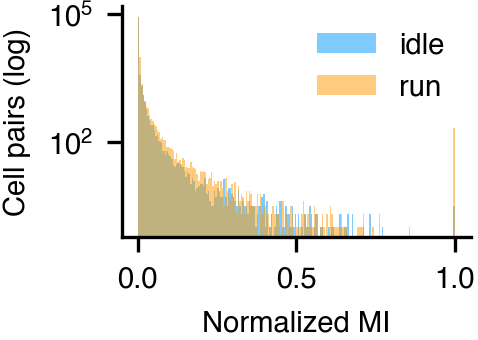

In [65]:
# Plot histogram
plt.hist(idle_NMI_mx.flatten(), bins=200, color=[0,.6,1,.5], label='idle')
plt.hist(run_NMI_mx.flatten(), bins=200, color=[1,.6,0,.5], label='run')
#plt.xlim(0.001,.025)
plt.yscale('log')
plt.xlabel('Normalized MI')
plt.ylabel('Cell pairs (log)')
plt.legend()
plt.savefig('results/figures/fig2/NMI_histogram.pdf', bbox_inches='tight')

0.2740175421212811